In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Visualization script for Heisenberg model

Ns    Nf       x     y    z          H 

900   1e6   -162    13   55    1808450
900   1e7   -220   -13   81   19017500
900   1e8   -252  -169  159  194487000
---------------------------------------
900   1e5   -100    -2   -7     
900   1e6   -174    -4  -19       -823
900   1e7   -264   -79  -18       -847
900   1e8   -358  -239  -58       -858

TODO: Make header names for columns of data

Position_x Position_y Position_z Spin_x Spin_y Spin_z Total_energy

In [61]:
data = pd.read_csv("seq_out.txt",sep="\\s+")
position = np.array([data["Position_x"],data["Position_y"],data["Position_z"]])
spin = np.array([data["Spin_x"],data["Spin_y"],data["Spin_z"]])
energy = np.array(data["Total_energy"])
S = np.sqrt(spin[0]**2 + spin[1]**2 + spin[2]**2)
nspins = len(S)
side = int(np.sqrt(nspins))
print(S)
print('Total energy of spin[1]stem',energy[-1])
print(f'Total x spin: {np.sum(spin[0]):.1f}\nTotal y spin: {np.sum(spin[1]):.1f}\nTotal z spin: {np.sum(spin[2]):.1f}')
print('Number of spins: ',len(S))

[1.00000015 0.99999989 1.00000022 0.99999976 0.99999991 1.00000042
 0.99999981 0.99999998 1.00000026 1.00000019 0.99999981 1.00000024
 1.00000049 1.00000024 0.99999997 0.99999964 1.00000007 0.9999996
 1.00000039 1.00000005 0.99999962 1.0000003  1.00000047 0.99999984
 0.99999961]
Total energy of spin[1]stem -0.646304
Total x spin: -1.0
Total y spin: -1.2
Total z spin: 9.8
Number of spins:  25


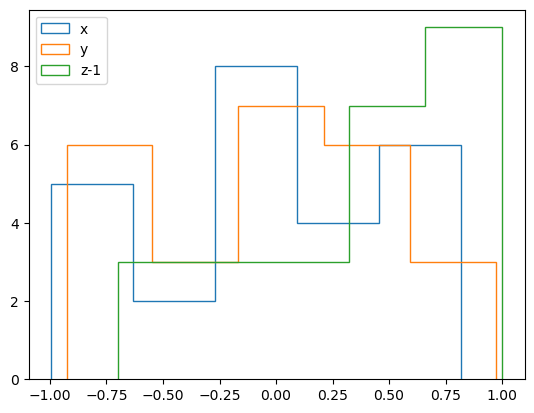

In [62]:
#plt.hist(S,300,histtype = 'step');
#plt.yscale('log')
#plt.show()
plt.hist(spin[0],bins = int(np.sqrt(nspins)),histtype = 'step',label = 'x');
plt.hist(spin[1],bins = int(np.sqrt(nspins)),histtype = 'step',label = 'y');
plt.hist(spin[2],bins = int(np.sqrt(nspins)),histtype = 'step',label = 'z-1');


plt.legend()

(array([[ 0.,  0.,  4., 12.,  9.],
        [ 8.,  5.,  0.,  6.,  6.]]),
 array([-2.35619449, -1.41371669, -0.4712389 ,  0.4712389 ,  1.41371669,
         2.35619449]),
 <a list of 2 list[Polygon] objects>)

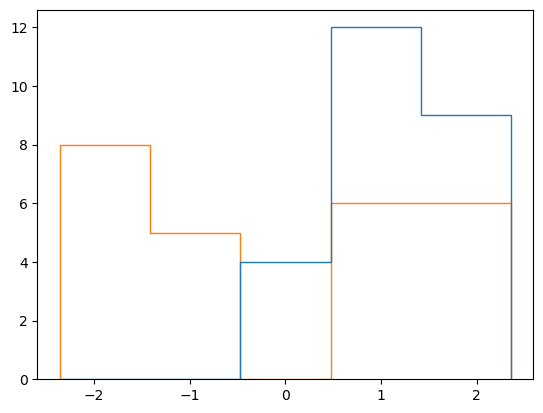

In [63]:
plt.hist([np.arccos(spin[2]/S),np.sign(spin[1])*np.arccos(spin[0]/np.sqrt(spin[0]**2+spin[0]**2))],bins = int(np.sqrt(nspins)),histtype='step',label = ['theta','phi'])


In [64]:
xx = spin[0].reshape((side,side))
yy = spin[1].reshape((side,side))
zz = spin[2].reshape((side,side))


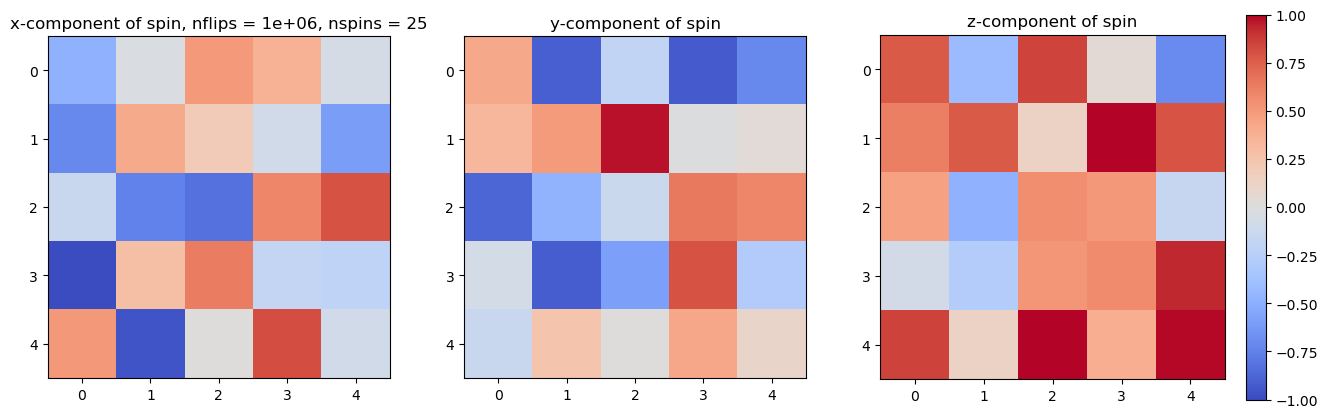

In [65]:
fig,ax = plt.subplots(1,3,figsize = (16.3,5),gridspec_kw ={'width_ratios':[5,5,6.3]})
if ndims == 2:
    ax[0].imshow(xx,cmap = 'coolwarm',vmin = -1,vmax = 1)
    ax[1].imshow(yy,cmap = 'coolwarm',vmin = -1,vmax = 1)
    im2=ax[2].imshow(zz,cmap = 'coolwarm',vmin = -1,vmax = 1)
elif ndims == 3:
    ax[0].imshow(xx[Side//2],cmap = 'coolwarm',vmin = -1,vmax = 1)
    ax[1].imshow(yy[Side//2],cmap = 'coolwarm',vmin = -1,vmax = 1)
    im2=ax[2].imshow(zz[Side//2],cmap = 'coolwarm',vmin = -1,vmax = 1)
    
ax[0].set_title(f'x-component of spin, nflips = {Nflips:.0e}, nspins = {nspins}')
ax[1].set_title('y-component of spin')
ax[2].set_title('z-component of spin')
fig.colorbar(im2,ax = ax[2])
plt.savefig('xcomp.png')

In [68]:
if (needs_to_run==True):
    Nsize = np.arange(1,21)*10
    Nexp = 100000
    Counts = np.zeros((len(Nsize),Nexp))
    for isize in range(16,len(Nsize)):
        N = Nsize[isize]
        for iexp in range(Nexp):
            grid = np.zeros((N,N))
            counter = 0
            while True:
                rand_coord = np.random.randint(low = 0,high = N,size = 2)
                if not grid[rand_coord[0],rand_coord[1]]:
                    grid[rand_coord[0],rand_coord[1]] = 1
                    grid[np.max([rand_coord[0]-1,0]),rand_coord[1]] = 1
                    grid[np.min([rand_coord[0]+1,N-1]),rand_coord[1]] = 1
                    grid[rand_coord[0],np.max([rand_coord[1]-1,0])] = 1
                    grid[rand_coord[0],np.min([rand_coord[1]+1,N-1])] = 1
                    counter += 1
                else:
                    Counts[isize,iexp] = counter
                    break
        print(N)


In [52]:
two_sigma_limits = np.quantile(Counts,0.045,axis = 1)
two_sigma_limits

NameError: name 'Counts' is not defined

#### Ndims,   Side Length, 2 sigma of not hitting a neighbour
2     10     1
2     20     3
2     30     4
2     40     5
2     50     7
2     60     8
2     70     9
2     80     11
2     90     12
2    100     14
2    110     15
2    120     16
2    130     18
2    140     19
2    150     21
2    160     22
2    170     23
2    180     24
2    190     26
2    200     27

NameError: name 'Counts' is not defined

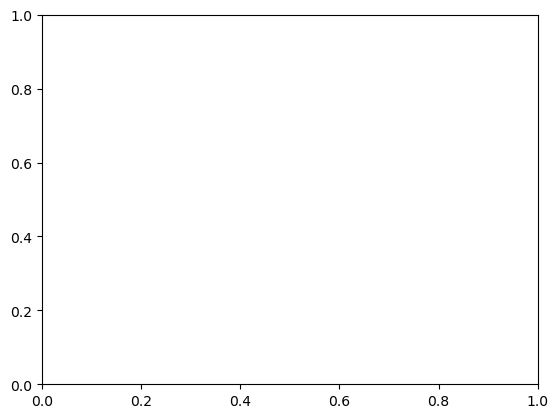

In [53]:
fig,ax = plt.subplots()
n=19
Array = Counts[n]
bins = np.arange(np.max(Array)-np.min(Array)+1)+np.min(Array)-0.5
ax.hist(Array,bins,histtype = 'step',density = True,color = 'b');
ax1 = ax.twinx()
ax1.hist(Array,bins,histtype = 'step',density = True,cumulative = True,color = 'r');
ax1.vlines(two_sigma_limits[n],0,1.1,color = 'r')
ax1.set(ylim=(0,1.05))

In [54]:
plt.plot(Nsize,two_sigma_limits,'.-')

NameError: name 'two_sigma_limits' is not defined

In [55]:
nspins

25

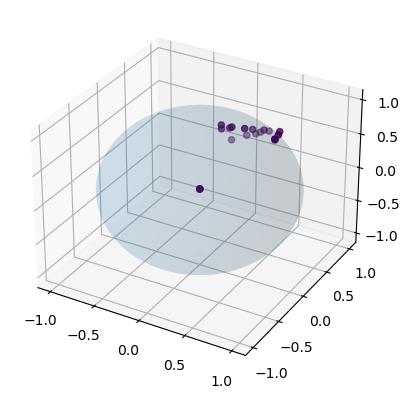

In [56]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(spin[0], spin[1], spin[2], c=energy)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(x, y, z, alpha=0.1)